                     MODEL RESULTS                     
           Model  Accuracy  Precision  Recall  F1 Score    AUC
1  Decision Tree    0.8579     0.7387  0.4339    0.5467 0.8218
2            SVM    0.8558     0.7525  0.4021    0.5241 0.8032
3  Random Forest    0.8605     0.7817  0.4074    0.5357 0.8575
4        XGBoost    0.8683     0.7864  0.4577    0.5786 0.8591


,Model,Accuracy,Precision,Recall,F1 Score,AUC
1,Decision Tree,0.8579,0.7387,0.4339,0.5467,0.8218
2,SVM,0.8558,0.7525,0.4021,0.5241,0.8032
3,Random Forest,0.8605,0.7817,0.4074,0.5357,0.8575
4,XGBoost,0.8683,0.7864,0.4577,0.5786,0.8591


Error saving with dataframe_image: Command '['--enable-logging', '--disable-gpu', '--headless=old', '--crash-dumps-dir=C:\\Users\\slawo\\.dataframe_image\\tmpttsrufd3', '--force-device-scale-factor=1', '--window-size=1400,900', '--hide-scrollbars', '--screenshot=C:\\Users\\slawo\\.dataframe_image\\tmpttsrufd3\\temp.png', 'C:\\Users\\slawo\\.dataframe_image\\tmpttsrufd3\\temp.html']' returned non-zero exit status 1.
Table saved with matplotlib to: C:\Nauka\Studia\3 semestr\AI\Bank Customer Churn Dataset\model_results_matplotlib_table.png
Saved Accuracy comparison plot to: C:\Nauka\Studia\3 semestr\AI\Bank Customer Churn Dataset\accuracy_comparison.png


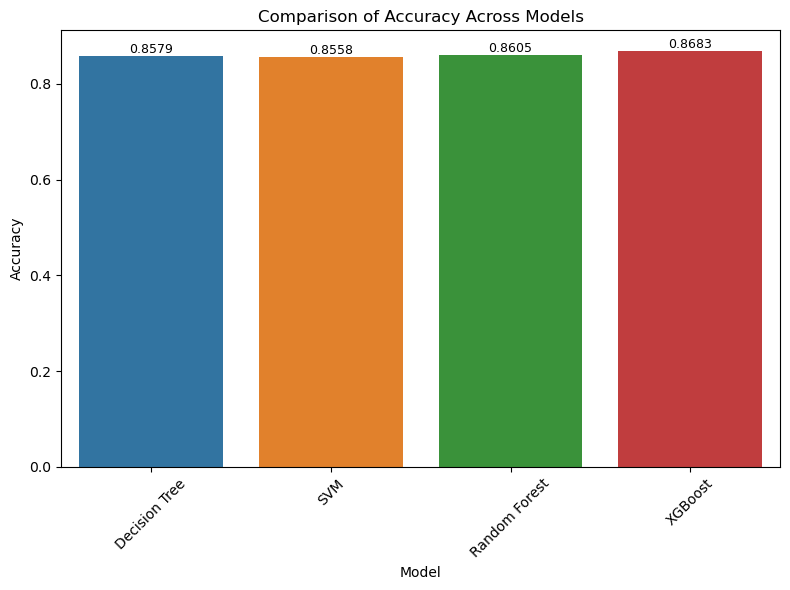

Saved Precision comparison plot to: C:\Nauka\Studia\3 semestr\AI\Bank Customer Churn Dataset\precision_comparison.png


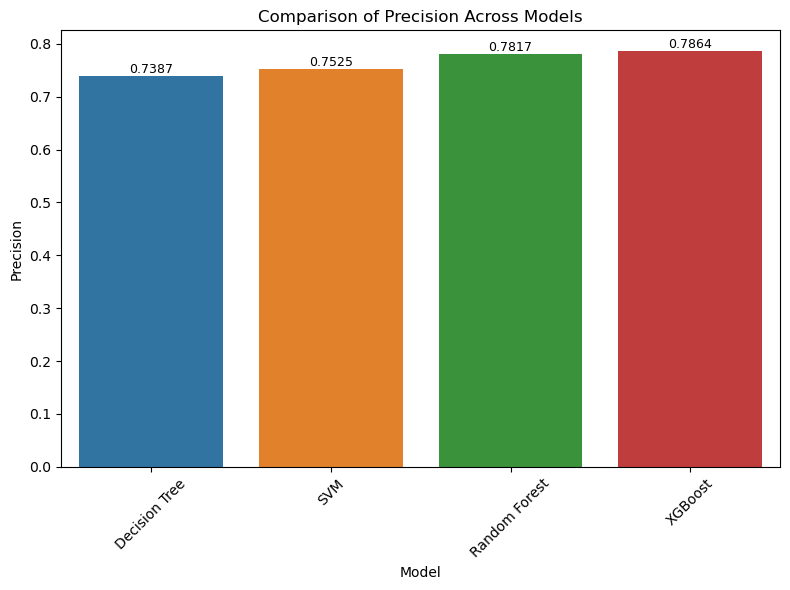

Saved Recall comparison plot to: C:\Nauka\Studia\3 semestr\AI\Bank Customer Churn Dataset\recall_comparison.png


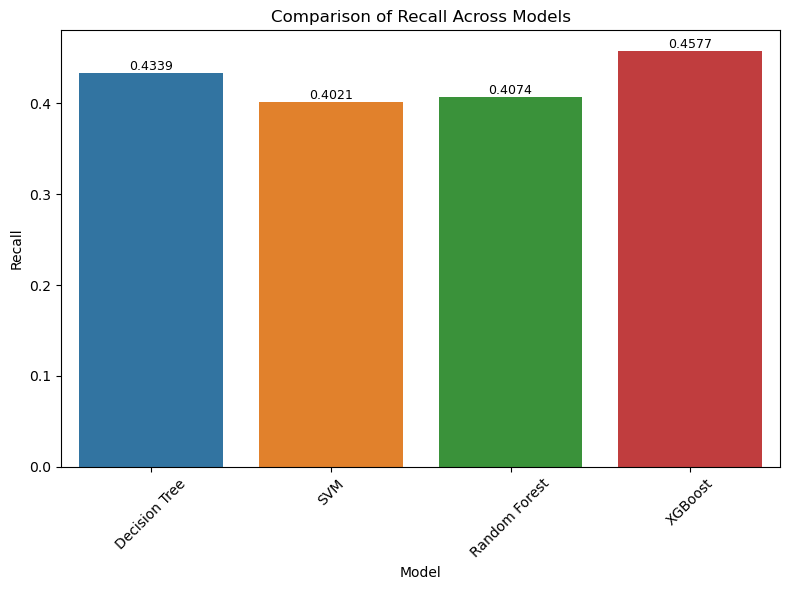

Saved F1 Score comparison plot to: C:\Nauka\Studia\3 semestr\AI\Bank Customer Churn Dataset\f1_score_comparison.png


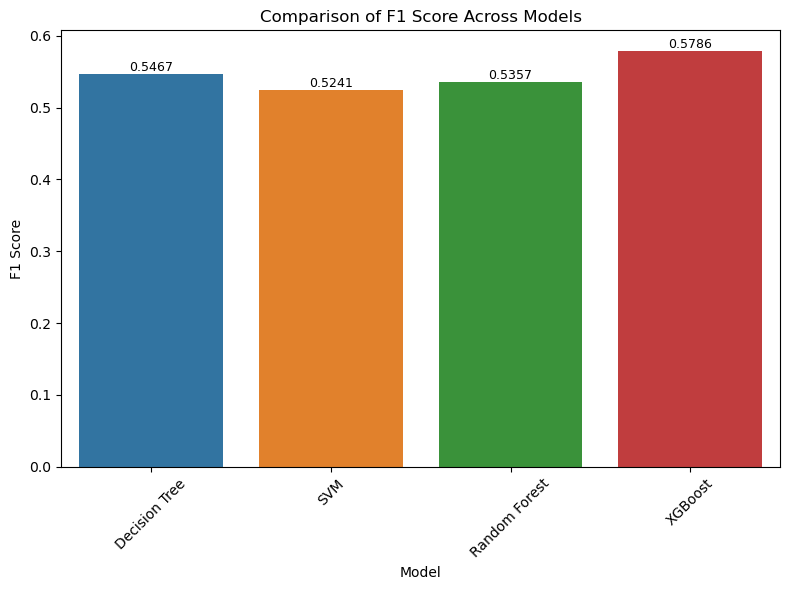

Saved AUC comparison plot to: C:\Nauka\Studia\3 semestr\AI\Bank Customer Churn Dataset\auc_comparison.png


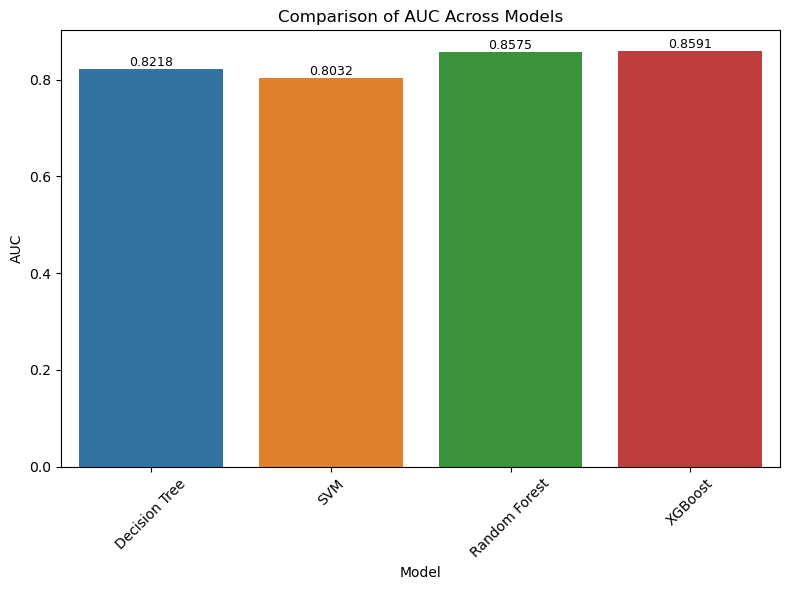

Saved heatmap to: C:\Nauka\Studia\3 semestr\AI\Bank Customer Churn Dataset\model_performance_heatmap.png


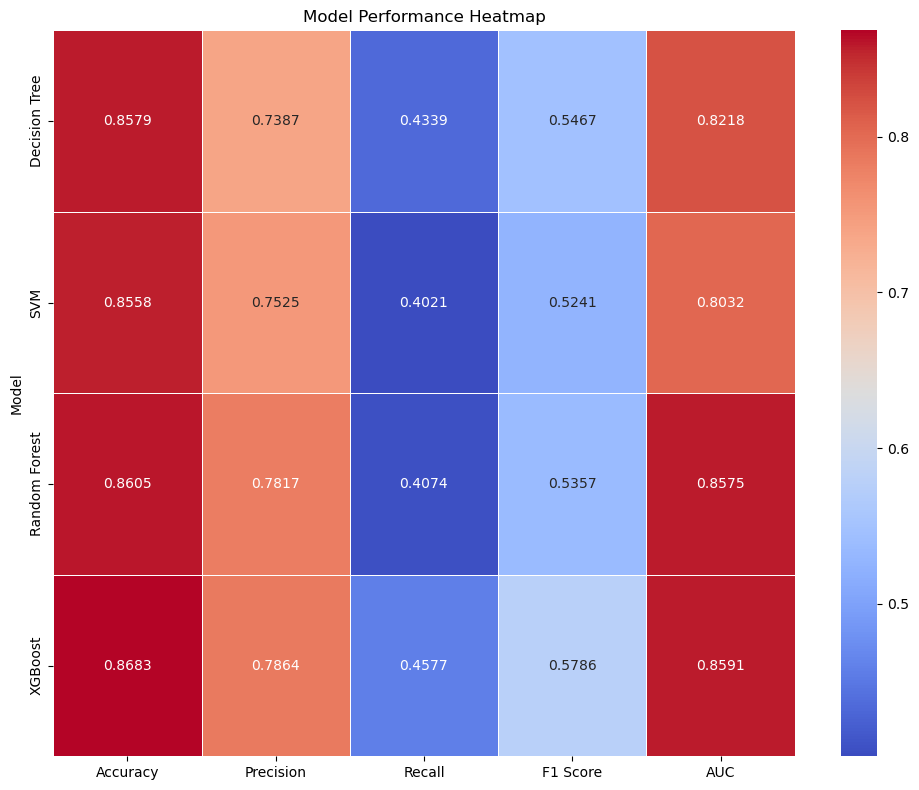


All visualizations completed successfully!


In [6]:
# # Bank Customer Churn Data Visualization
# This notebook visualizes the model results from the bank customer churn prediction project.

# ## 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Try to import dataframe_image, but provide alternative if it fails
try:
    import dataframe_image as dfi
    has_dfi = True
except (ImportError, Exception):
    has_dfi = False
    print("dataframe_image not available or not working. Using alternative visualization approach.")

# ## 2. Load and Format Results Data

# Load results from the CSV file
results_csv_path = r"C:\Nauka\Studia\3 semestr\AI\Bank Customer Churn Dataset\model_results.csv"
results_df = pd.read_csv(results_csv_path)  # Load the results into a DataFrame

# Adjust index to start from 1
results_df.index = results_df.index + 1  # Change index to start from 1 instead of 0

# ## 3. Display Results in Console

# Enhanced console output with visual style
print("=" * 60)  # Print a decorative line
print("                     MODEL RESULTS                     ")  # Title for the results
print("=" * 60)  # Print another decorative line

# Print the DataFrame as a table in the console
print(results_df.to_string(index=True, float_format=lambda x: f"{x:.4f}"))

# ## 4. Create and Display Styled Table

# Style the table using pandas for a visually appealing output
styled_table = (
    results_df.style
    .set_table_styles(  # Set custom styles for the table
        [
            {'selector': 'thead th', 'props': [('background-color', '#e0e0e0'),  # Light gray header background
                                               ('font-weight', 'bold'),         # Bold header text
                                               ('text-align', 'center')]},      # Centered header text
            {'selector': 'tbody td', 'props': [('border', '1px solid #d3d3d3'),  # Light gray cell border
                                               ('text-align', 'center')]}       # Centered cell text
        ]
    )
    .format("{:.4f}", subset=["Accuracy", "Precision", "Recall", "F1 Score", "AUC"])  # Format numerical values to 4 decimals
)

# Try to display the styled table if in a Jupyter environment
try:
    from IPython.display import display
    display(styled_table)
except ImportError:
    print("Styled table can only be rendered in Jupyter or compatible environments.")

# ## 5. Save Table as Image

# Path for saving the table visualization
table_path = r"C:\Nauka\Studia\3 semestr\AI\Bank Customer Churn Dataset\model_results_table.png"

# Try to save with dataframe_image if available
if has_dfi:
    try:
        dfi.export(styled_table, table_path)
        print(f"Table saved with dataframe_image to: {table_path}")
    except Exception as e:
        print(f"Error saving with dataframe_image: {e}")
        has_dfi = False  # Fall back to alternative method

# Alternative method to save table visualization using matplotlib
if not has_dfi:
    plt.figure(figsize=(12, 4))
    ax = plt.subplot(111, frame_on=False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    # Create table with cell coloring based on values for metrics columns
    table = plt.table(
        cellText=results_df.round(4).values,
        colLabels=results_df.columns,
        rowLabels=results_df.index,
        cellLoc='center',
        loc='center'
    )
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    
    # Save using matplotlib
    matplotlib_table_path = r"C:\Nauka\Studia\3 semestr\AI\Bank Customer Churn Dataset\model_results_matplotlib_table.png"
    plt.savefig(matplotlib_table_path, bbox_inches='tight', dpi=150)
    print(f"Table saved with matplotlib to: {matplotlib_table_path}")
    plt.close()

# ## 6. Create Bar Charts for Each Metric

# Define metrics to visualize
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

# Create individual bar charts for each metric
for metric in metrics:
    plt.figure(figsize=(8, 6))  # Set figure size
    
    # Updated barplot with hue parameter and legend=False to avoid warning
    ax = sns.barplot(
        x="Model", 
        y=metric, 
        data=results_df, 
        hue="Model",  # Set hue to Model
        legend=False  # Hide the legend
    )
    
    # Add data labels on top of bars
    for i, p in enumerate(ax.patches):
        ax.annotate(
            f'{p.get_height():.4f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', 
            va='bottom',
            fontsize=9
        )
    
    plt.title(f"Comparison of {metric} Across Models")  # Set plot title
    plt.ylabel(metric)  # Label for the y-axis
    plt.xlabel("Model")  # Label for the x-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlaps
    
    # Save plot with properly formatted path
    metric_name = metric.lower().replace(' ', '_')
    plot_path = os.path.join(
        r"C:\Nauka\Studia\3 semestr\AI\Bank Customer Churn Dataset", 
        f"{metric_name}_comparison.png"
    )
    plt.savefig(plot_path, dpi=150)  # Save with higher resolution
    print(f"Saved {metric} comparison plot to: {plot_path}")
    
    # Display in Jupyter
    plt.show()

# ## 7. Generate Performance Heatmap

# Create heatmap to compare all metrics across models
plt.figure(figsize=(10, 8))  # Set figure size for the heatmap
heatmap_data = results_df.set_index("Model")[metrics]  # Set 'Model' as the index for better heatmap display

# Create heatmap with values displayed
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".4f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    cbar=True
)

plt.title("Model Performance Heatmap")  # Set heatmap title
plt.tight_layout()  # Adjust layout to prevent overlaps

# Save the heatmap
heatmap_path = r"C:\Nauka\Studia\3 semestr\AI\Bank Customer Churn Dataset\model_performance_heatmap.png"
plt.savefig(heatmap_path, dpi=150)  # Save with higher resolution
print(f"Saved heatmap to: {heatmap_path}")

# Display in Jupyter
plt.show()

print("\nAll visualizations completed successfully!")